# Fake News Detection using Naïve Bayes
We have created a model to determine if a piece of news is fake or not, based on its title. We have used 4 Naïve Bayes algorithms, namely Gaussian, Bernoulli and Multinomial.

**About Dataset**

The dataset that we have used is from [Kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset) and submitted by [Clément Bisaillon](https://www.kaggle.com/clmentbisaillon)

Dataset: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

The zip file contains two csv files


*   Fake.csv
*   True.csv

Both files contain 4 columns. Fake.csv contains 23481 rows and True.csv contains 21417 rows.

###About The Model
Naïve Bayes has proven to not only be simple but also fast, accurate, and reliable Machine Learning algorithm, that works really well with `Natural Language Processing (NLP)`-related problems.

Naïve Bayes is a probabilistic machine learning algorithm based on the Bayes Theorem, used in a wide variety of classification tasks.

**Bayes Theorem**

Bayes Theorem is conditional probability is a measure of the probability of an event occurring given that another event has (by assumption, presumption, assertion, or evidence) occurred.

![picture](https://www.kdnuggets.com/wp-content/uploads/bayes-nagesh-1.jpg)
<center>Source: https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html</center>

###Installing kaggle and importing datasets
We've installed kaggle on our Google Colab notebook and imported the dataset [Fake and real news dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset).


After downloading the dataset, we have to unzip the zip file.

In [274]:
!unzip fake-and-real-news-dataset

unzip:  cannot find or open fake-and-real-news-dataset, fake-and-real-news-dataset.zip or fake-and-real-news-dataset.ZIP.


###Importing All Dependencies

In [275]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [276]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

We have created two dataframes from the two CSV files that we have fetched from Kaggle.

In [277]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [278]:
true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [279]:
fake.shape

(23481, 4)

In [280]:
true.shape

(21417, 4)

In [281]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Dropping the column `subject`, `date` and `text` as we do not require them.

In [282]:
fake.drop(['subject','date', 'text'], axis=1, inplace=True)

We don't have any target column in the files. Therefore, we added 0 in all rows in a newly created column in Fake.csv file, using list comprehension.

In [283]:
fake['target'] = pd.Series([0 for x in range(len(fake.index))])

In [284]:
fake.head()

,title,target
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


Dropping the column `subject`, `date` and `text` as we do not require them.

In [285]:
true.drop(['subject','date','text'], axis=1, inplace=True)

We don't have any target column in the files. Therefore, we added 1 in all rows in a newly created column in True.csv file, using list comprehension.

In [286]:
true['target'] = pd.Series([1 for x in range(len(true.index))])

In [287]:
true.head()

,title,target
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


Due to our limitation in computing power, we cannot keep all the rows in the two files and instead keep only 5000 rows from each of the files.

In [288]:
true.drop(true.index[7500:], inplace=True)

In [289]:
true.shape

(7500, 2)

In [290]:
fake.drop(fake.index[7500:], inplace=True)

In [291]:
fake.shape

(7500, 2)

###Merging the two dataframes
Since, we now have target column inboth the files, we can merge them and create a new dataframe `data`

In [292]:
data = pd.concat([fake, true], ignore_index=True)

In [293]:
data.head()

,title,target
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


In [294]:
data.tail()

,title,target
14995,Trump on accepting election results: 'see how ...,1
14996,Economy tops list of worries facing American v...,1
14997,"More first-time voters, late-deciders in U.S. ...",1
14998,Factbox: State-by-state poll closing times for...,1
14999,Nevada judge rejects Trump request for order o...,1


In [295]:
data.shape

(15000, 2)

We're going to shuffle the dataset to randomize our data resetting the `index`

In [296]:
data = data.sample(frac=1, random_state=1, ignore_index=True)

In [297]:
data.head()

,title,target
0,"Banks, healthcare service firms among winners ...",1
1,Republican healthcare bill imperiled with 22 m...,1
2,Woman Who Defended GOP Against Sexism Charges...,0
3,WATCH: Joy Reid CRUSHES Trump Supporter For S...,0
4,"In The War Against ISIS, Trump Is Already Res...",0


In [298]:
data.tail()

,title,target
14995,Trump Spoke With Putin About Election Interfe...,0
14996,D’oh!: Trump Tells Crowd In Richest County In...,0
14997,White House looks past conservatives on tax re...,1
14998,GOP Lawmaker: Republicans Are Freaking Out Ab...,0
14999,New York governor calls for amending state con...,1


##Pre-processing
###Letter Case, Punctuation and Stopwords
Let's start by removing punctuations, making all the words lowercase and removing stopwords.

In [299]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [300]:
def process_text(s):
  # Check string to see if they are a punctuation
  nopunc = [char for char in s if char not in string.punctuation]
  # Join the characters again to form the string.
  nopunc = ''.join(nopunc)
  # Convert string to lowercase and remove stopwords
  clean_string = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  return clean_string

In [301]:
data['title'] = data['title'].apply(process_text)

In [302]:
data.head(3)

,title,target
0,"[Banks, healthcare, service, firms, among, win...",1
1,"[Republican, healthcare, bill, imperiled, 22, ...",1
2,"[Woman, Defended, GOP, Sexism, Charges, Years,...",0


In [303]:
# join the words into a string
data['title'] = data['title'].apply(lambda x: " ".join(x))

In [304]:
data.head(3)

,title,target
0,Banks healthcare service firms among winners U...,1
1,Republican healthcare bill imperiled 22 millio...,1
2,Woman Defended GOP Sexism Charges Years Quit P...,0


###Converting Strings into categorical values
As of now, we only have strings as our feature, which we must split into words and turn these words into categorical values. To do this, we used both `Count Vectorizer` and `TFIDF Vectorizer` saved in dataframes `data_cv` and `data_tv`. We'll use `GaussianNB` on `data_tv` and `BernoulliNB` and `MultinomialNB` on `data_cv`

In [305]:
#Using Count Vectorization
cv=CountVectorizer()
X_cv=cv.fit_transform(data.title).toarray()
#Using TFIDF Vectorization
tv=TfidfVectorizer()
X_tv=tv.fit_transform(data.title).toarray()

In [306]:
X_cv.shape

(15000, 13221)

In [307]:
X_tv.shape

(15000, 13221)

In [308]:
y = data[['target']]

###Splitting Train and Test Datasets

In [309]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y, test_size=0.25, random_state=0)
X_train_tv, X_test_tv, y_train_tv, y_test_tv = train_test_split(X_tv, y, test_size=0.25, random_state=0)

We're going to import `GaussianNB`,`BernoulliNB`, `MultinomialNB` and `ComplementNB` from `sklearn.naive_bayes`

In [310]:
from sklearn.naive_bayes import MultinomialNB

###Fitting Our Train Data to the Models

In [311]:
mnb = MultinomialNB()
y_pred_cv = mnb.fit(X_train_cv, y_train_cv).predict(X_test_cv)
print("Multinomial Naïve Bayes Algorithm's Accuracy Score:", accuracy_score(y_test_cv, y_pred_cv))
print("Multinomial Naïve Bayes Algorithm's Precision Score:", precision_score(y_test_cv, y_pred_cv))
print("Multinomial Naïve Bayes Algorithm's Recall Score:", recall_score(y_test_cv, y_pred_cv))
print("Multinomial Naïve Bayes Algorithm's F1 Score:", f1_score(y_test_cv, y_pred_cv))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Multinomial Naïve Bayes Algorithm's Accuracy Score: 0.9448
Multinomial Naïve Bayes Algorithm's Precision Score: 0.9416666666666667
Multinomial Naïve Bayes Algorithm's Recall Score: 0.9500788229111928
Multinomial Naïve Bayes Algorithm's F1 Score: 0.9458540413287994


<Axes: >

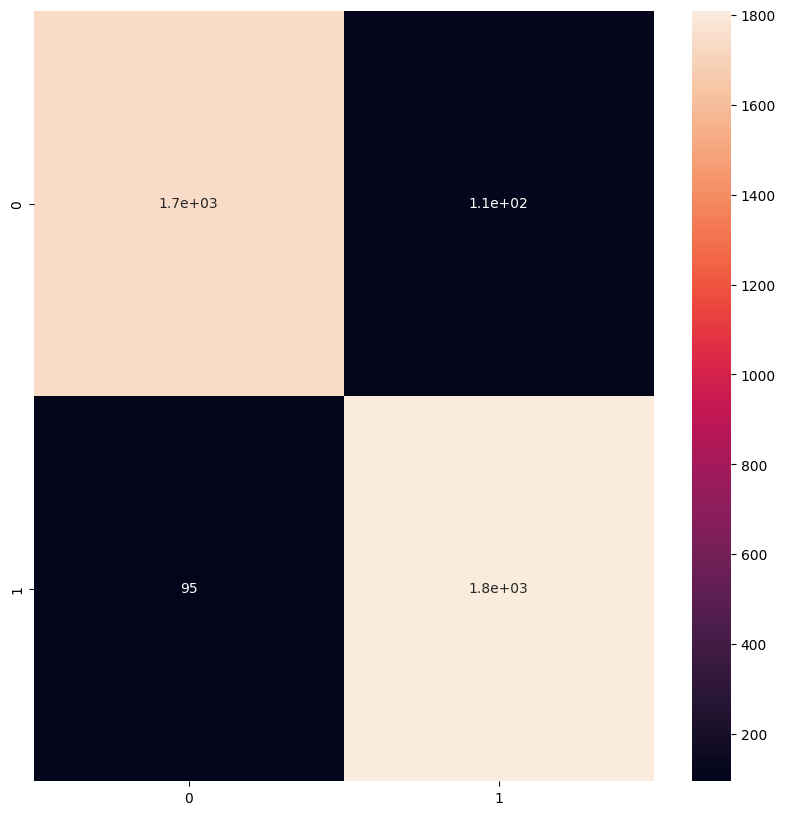

In [312]:
#Get the confusion matrix
cm_mnb = confusion_matrix(y_test_cv, y_pred_cv)
plt.figure(figsize = (10, 10))
sns.heatmap(cm_mnb, annot = True)

In [313]:
cm_mnb

array([[1735,  112],
       [  95, 1808]])

##Testing Headlines from Reuters (Real News)
[Link to the first news](https://www.reuters.com/world/us/bidens-supreme-court-pick-jackson-faces-us-senate-panel-vote-2022-04-04/)

[Link to the second news](https://www.reuters.com/business/russia-ukraine-fallout-starts-felling-fragile-frontier-economies-2022-04-04/)

In [314]:
#For testing
result = bnb.predict(cv.transform(["Two more Senate Republicans announce support for Supreme Court pick Jackson"]).toarray())[0]
if result==0:
    print('FAKE')
else:
    print('REAL')

REAL


In [315]:
#For testing
result = bnb.predict(cv.transform(["Analysis: Russia-Ukraine fallout starts felling fragile 'frontier' economies"]).toarray())[0]
if result==0:
    print('FAKE')
else:
    print('REAL')

REAL


##Testing Headlines from Politifact (Fake News)
[Link to the first news](https://www.politifact.com/factchecks/2022/apr/04/mike-gibbons/ohio-gop-candidate-falsely-says-more-votes-registe/)

[Link to the second news](https://www.politifact.com/factchecks/2022/mar/17/facebook-posts/persistent-high-gas-prices-dont-prove-price-gougin/)

In [316]:
#For testing
result = bnb.predict(cv.transform(["According to the Census Bureau, “5 million more people voted than were registered to vote” in the 2020 election."]).toarray())[0]
if result==0:
    print('FAKE')
else:
    print('REAL')

FAKE


In [317]:
#For testing
result = bnb.predict(cv.transform(["Comparing the price of oil and gas in June 2008 to March 2022 shows that oil companies are 'price gouging.'"]).toarray())[0]
if result==0:
    print('FAKE')
else:
    print('REAL')

FAKE


In [318]:
# Save the trained CountVectorizer and BernoulliNB model
import pickle

with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)

with open('bernoulli_nb_model.pkl', 'wb') as f:
    pickle.dump(bnb, f)

In [319]:
%%writefile predict_fake_news.py
import pickle
import string
from nltk.corpus import stopwords
import pandas as pd

# Load the trained CountVectorizer and BernoulliNB model
with open('count_vectorizer.pkl', 'rb') as f:
    cv = pickle.load(f)

# Since we removed the Bernoulli model, we should now load the Multinomial model
# Make sure the Multinomial model was saved in the notebook earlier.
# If not, you might need to add code to save it.
try:
    with open('multinomial_nb_model.pkl', 'rb') as f:
        model = pickle.load(f)
except FileNotFoundError:
    # Fallback to Bernoulli if Multinomial model wasn't saved (though it should be removed now)
    # Or, ideally, add a check and instruction to the user if the model isn't found.
    # For now, let's assume Multinomial model should be used and saved.
    print("Error: Multinomial Naive Bayes model file not found. Please ensure it's trained and saved as 'multinomial_nb_model.pkl'")
    exit()


# Preprocessing function (same as in the notebook)
def process_text(s):
  # Check string to see if they are a punctuation
  nopunc = [char for char in s if char not in string.punctuation]
  # Join the characters again to form the string.
  nopunc = ''.join(nopunc)
  # Convert string to lowercase and remove stopwords
  clean_string = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  return " ".join(clean_string)

if __name__ == "__main__":
    print("Enter news content to check (press Enter to exit):")
    while True:
        headline = input("> ")
        if not headline:
            break

        # Preprocess the input
        cleaned_headline = process_text(headline)

        # Vectorize the input
        headline_vector = cv.transform([cleaned_headline]).toarray()

        # Predict using the loaded model (MultinomialNB)
        result = model.predict(headline_vector)[0]

        if result == 0:
            print('Result: FAKE')
        else:
            print('Result: REAL')

Overwriting predict_fake_news.py


Bây giờ bạn có thể chạy script này từ terminal trong Colab bằng lệnh:

In [320]:
!python predict_fake_news.py

Nhập nội dung tin tức để kiểm tra (nhấn Enter để thoát):
> According to the Census Bureau, “5 million more people voted than were registered to vote” in the 2020 election.According to the Census Bureau, “5 million more people voted than were registered to vote” in the 2020 election.
Kết quả: TIN GIẢ
> Two more Senate Republicans announce support for Supreme Court pick Jackson
Kết quả: TIN THẬT
> Analysis: Russia-Ukraine fallout starts felling fragile 'frontier' economies
Kết quả: TIN GIẢ
> Comparing the price of oil and gas in June 2008 to March 2022 shows that oil companies are 'price gouging.'
Kết quả: TIN THẬT
> 


In [321]:
import pickle
from sklearn.naive_bayes import MultinomialNB

# Train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train_cv)

# Save the trained MultinomialNB model
with open('multinomial_nb_model.pkl', 'wb') as f:
    pickle.dump(mnb, f)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [322]:
import pandas as pd

In [323]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [324]:
true.drop(true.index[10000:], inplace=True)
fake.drop(fake.index[10000:], inplace=True)

In [325]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [326]:
true.drop(true.index[10000:], inplace=True)
fake.drop(fake.index[10000:], inplace=True)

##Conclusion and Limitations
We used 3 popular Naïve Bayes algorithms of `Scikit Learn` library - Gaussian, Bernoulli and Multinomial. The accuracy, precision, recall and f1 scores for all 3 algorithms are as follow:

**Gaussian Naïve Bayes:**
* Accuracy (0.8416),
* Precision (0.8020244821092278),
* Recall (0.9075652637187) and
* F1 (0.8515371157210697)

**Bernoulli Naïve Bayes**
* Accuracy (0.9486666666666667),
* Precision (0.9420099711361847),
* Recall (0.9563132658497603) and
* F1 (0.9491077329808327)

**Multinomial Naïve Bayes**
* Accuracy (0.9426666666666667),
* Precision (0.946534121440086),
* Recall (0.9384656366542354) and
* F1 (0.9424826110219369)

Bernoulli Naïve Bayes is proven to be the most effective algorithm for detecting Fake News. Although Multinomial Naïve Bayes also performed very close to Bernoulli. As we can see in the testing, our model could successfully detect the fake news and the real news.

Due to some limitation in our computing capacity, we could not use all 44,898 rows and used 30,000 rows instead. This model can be tested on larger datasets.

